In [1]:
from sklearn.datasets import fetch_openml
mn = fetch_openml('mnist_784')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(mn.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X, y = mn["data"], mn["target"]

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


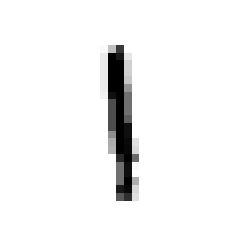

In [6]:
yourDigit = X[8]
Your_image = yourDigit.reshape(28, 28)
plt.imshow(Your_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()


In [7]:
X_tr, X_tes, y_tr, y_tes = X[:60000], X[60000:], y[:60000], y[60000:]


## Let’s play with your training set as follows to make the cross-validation to be similar (without any missing of any digit)


In [8]:
myData = np.random.permutation(50000) # случайная последовательность от 0 до 49999

In [9]:
X_tr, y_tr = X_tr[myData], y_tr[myData]

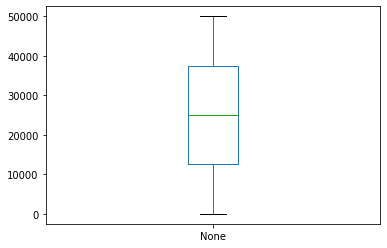

In [10]:
pd.Series(myData).plot(kind='box')  # немножко поигрался с боксплотом

### Now it’s time to make it simple enough, we'll try to just identify one digit, e.g.the number 6. This “6-detector” will be an example of the binary classifier, to distinguish between 6 and not 6, so we'll create the vectors for this task: Y_tr_6 = (y_tr == 6) // this means it will be true for 6s, and false for any other number Y_tes_6 = (Y_tes == 6)


In [11]:
y_tr_6 = (y_tr == '6')
y_tes_6 = (y_tes == '6')

In [12]:
data = pd.DataFrame(y_tr_6)

In [13]:

data.iloc[:,0].value_counts()

False    45049
True      4951
Name: 0, dtype: int64

##  SGD (Stochastic Gradient Descent) classifier.


In [14]:
from sklearn.linear_model import SGDClassifier
mycl = SGDClassifier(random_state = 42)
mycl.fit(X_tr, y_tr_6)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
data = pd.DataFrame(mycl.predict(X_tes))

In [16]:
data[data.iloc[:, 0] == True]

,0
8,True
11,True
21,True
22,True
33,True
...,...
9976,True
9981,True
9982,True
9989,True


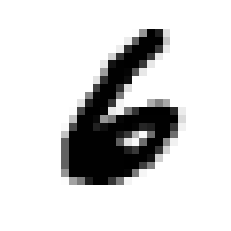

In [17]:
yourDigit = X_tes[9989]      # проверим как отработал классификатор ручным способомЮ находит нормально
Your_image = yourDigit.reshape(28, 28)
plt.imshow(Your_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [18]:
data

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [23]:
(data.iloc[:, 0] == y_tes_6).value_counts()

True     9633
False     367
Name: 0, dtype: int64

##  evaluate a classifier

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

sf = StratifiedKFold(n_splits=2, random_state = 40)
for train_index, test_index in sf.split(X_tr, y_tr_6):
    cl = clone(mycl)
    X_tr_fd = X_tr[train_index]
    y_tr_fd = (y_tr_6[train_index])
    X_tes_fd = X_tr[test_index]
    y_tes_fd = (y_tr_6[test_index])
    cl.fit(X_tr_fd, y_tr_fd)
    y_p = cl.predict(X_tes_fd)
    df = pd.DataFrame()
    df['pred'] = y_p
    df['test'] = y_tes_fd
    print(df[df.pred == df.test].shape[0] / df.shape[0])


C:\Users\AmanovRA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.97852
0.97688


## K-fold cross validation

In [45]:
from sklearn.model_selection import cross_val_score

cross_val_score(mycl, X_tr, y_tr_6, cv=3, scoring='accuracy')

array([0.97834043, 0.97090058, 0.97197888])

### Let’s classify every classifier at every single image in the not-6

In [46]:
from sklearn.base import BaseEstimator

class never6Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(X), 1), dtype=bool)

In [53]:
never_6_cl = never6Classifier()
cross_val_score(never_6_cl, X_tr, y_tr_6, cv = 3, scoring = 'accuracy')


TypeError: estimator should be an estimator implementing 'fit' method, BaseEstimator() was passed

In [54]:
?BaseEstimator